<a href="https://www.kaggle.com/code/ahedjneed/pool-prediction?scriptVersionId=97273721" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
​
The water guard faces a problem in counting the number of people in the pool. It is difficult to determine  when they coming or their number , especially if their number is large, and sometimes in winter he heats the pool and no one comes to the pool, so your task is to do data analysis and extract useful information from it, such as (what time do people come to the pool, etc.) to help them define when and when not he they should heats the pool and to create a model to predict the number of people who will be in the pool the next day to find out whether the pool should be heated or not.
​

i did two previous notebooks:

Notebook1 ([Pool Analysis|Data Processing + Data Visualization](https://www.kaggle.com/code/ahedjneed/pool-analysis-data-processing-data-visualization/notebook#Feature-Engeneering)) there you'll find complete EDA and the complete Data processing and Feature Engeneering for this Data Set.

Notebook2 ([Different| Time Series Visualization](https://www.kaggle.com/code/ahedjneed/different-time-series-visualization)) there you'll find clear Time Series Visualization version for this Data Set.


## Objective


**create a model to predict the number of people who will be in the pool the next day to find out whether the pool should be heated or not.**

**Content**:

*  convert objects to integers
*  handle ordinal columns
*  Using TabularPandas and TabularProc
*  Creating Decision Tree Model
*  Creating Random Forest Model
*  Out-of-Bag Error. (OOB)error measuring
*  Model Interpretation
*  Feature Importance

# Set Up

In [1]:
#The Following cell of code is used everytime FASTAI library is used.
#They tell the notebook to reload any changes made to any libraries used.
#They also ensure that any graphs are plotted are shown in this notebook
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!pip install waterfallcharts treeinterpreter dtreeviz

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 626.1 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.7 MB/s eta 0:00:00
  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3413 sha256=62a9b03839c4772627cba6f628c02d3f79f54c2181a952ec9049790a891ccf5f
  Stored in directory: /root/.cache/pip/wheels/4a/b2/85/9b6eda27fab2effa580c6942fb094e8536cc46e8741ec5f586
  Created wheel for dtreeviz: filename=dtreeviz-1.3.6-py3-none-any.whl size=67326 sha256=04f36fc22cd5d446bf3528657100d0d67df045b6355bcef770fe0c6e3fba5f1e
  Stored in directory: /root/.cache/pip/wheels/33/76/fe/99227ff871766e7284bb88d3d28e2f4886b8ec04d669033478
Successfully built waterfallcharts dtreeviz
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.8.4
    Uninstalling graphviz-0.8.4:
      Successfully uninstalled graphviz-0.8.4
ERROR: pip's

In [3]:
import numpy as pd
import numpy as np

from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
from pathlib import Path

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

import warnings
warnings.filterwarnings("ignore")

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp; Importing the Dataset <a id=6></a></p>

In [4]:
df = pd.read_csv('../input/waterguard-tulln/edited.csv')
# view dimensions of dataset
df.shape

(217852, 21)

In [5]:
# preview the dataset
df.head()

,Unnamed: 0,people_count,Temperature (C),date,...,timestampIs_year_start,timestampElapsed,season,timing
0,217851,0,0.0,2020-05-28 21:14:00,...,No,1.590700e+09,Spring,Evening
1,217850,0,0.0,2020-05-28 21:16:00,...,No,1.590701e+09,Spring,Evening
2,217849,0,0.0,2020-05-28 21:18:00,...,No,1.590701e+09,Spring,Evening
3,217848,0,0.0,2020-05-28 21:20:00,...,No,1.590701e+09,Spring,Evening
4,217847,0,0.0,2020-05-28 21:22:00,...,No,1.590701e+09,Spring,Evening


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217852 entries, 0 to 217851
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 217852 non-null  int64  
 1   people_count               217852 non-null  int64  
 2   Temperature (C)            217852 non-null  float64
 3   date                       217852 non-null  object 
 4   Formatted Date             217852 non-null  object 
 5   year                       217852 non-null  int64  
 6   month                      217852 non-null  int64  
 7   day                        217852 non-null  int64  
 8   weekday                    217852 non-null  object 
 9   weekofyear                 217852 non-null  int64  
 10  hour                       217852 non-null  int64  
 11  minute                     217852 non-null  int64  
 12  timestampIs_month_end      217852 non-null  object 
 13  timestampIs_month_start    21

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp; convert objects to integers <a id=6></a></p>

In [7]:
object_list = ['timestampIs_month_end','timestampIs_month_start','timestampIs_quarter_end',
            'timestampIs_quarter_start','timestampIs_year_end','timestampIs_year_start']
for var in object_list:
    df[var] = (df[var].map({'Yes':1, 'No':0}))
    
df[object_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217852 entries, 0 to 217851
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   timestampIs_month_end      217852 non-null  int64
 1   timestampIs_month_start    217852 non-null  int64
 2   timestampIs_quarter_end    217852 non-null  int64
 3   timestampIs_quarter_start  217852 non-null  int64
 4   timestampIs_year_end       217852 non-null  int64
 5   timestampIs_year_start     217852 non-null  int64
dtypes: int64(6)
memory usage: 10.0 MB


Let's delete the 'Formatted Date' and 'Date' we don't need them, because we do have the Date separated into section and 'Unnamed; is just the opposite number of index.

In [8]:
df.drop(['date','Formatted Date','Unnamed: 0'], axis=1, inplace = True)

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp; handle ordinal columns <a id=6></a></p>

At this point, a good next step is to handle *ordinal columns*. This refers to columns containing strings or similar, but where those strings have a natural ordering. For instance, here are the arrangement of `season`:

In [9]:
df['season'].unique()

array(['Spring ', 'Summer', 'Autumn', 'Winter'], dtype=object)

We can tell Pandas about a suitable ordering of these levels like so:

In [10]:
seasons = 'Winter','Spring','Summer','Autumn'

In [11]:
df['season'] = df['season'].astype('category')
df['season'].cat.set_categories(seasons, ordered=True, inplace=True)

the metric i'll use: root mean squared error (RMSE) between the actual and predicted people counts inside the pool. We need do only a small amount of processing to use this: we select people counts, so that `rmse` of that value will give us what we ultimately need:

In [12]:
dep_var = 'people_count'
df[dep_var] = df[dep_var]

We are now ready to explore our first machine learning algorithm for tabular data: decision trees.

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp; Using  TabularPandas and TabularProc <a id=6></a></p>

A second piece of preparatory processing is to be sure we can handle strings and missing data. Out of the box, sklearn cannot do either. Instead we will use fastai's class `TabularPandas`, which wraps a Pandas DataFrame and provides a few conveniences. To populate a `TabularPandas`, we will use two  `TabularProc`s, `Categorify` and `FillMissing`. A `TabularProc` is like a regular `Transform`, except that:

- It returns the exact same object that's passed to it, after modifying the object in place.
- It runs the transform once, when data is first passed in, rather than lazily as the data is accessed.

`Categorify` is a `TabularProc` that replaces a column with a numeric categorical column. `FillMissing` is a `TabularProc` that replaces missing values with the median of the column, and creates a new Boolean column that is set to `True` for any row where the value was missing. These two transforms are needed for nearly every tabular dataset you will use, so this is a good starting point for your data processing:

In [13]:
procs = [Categorify, FillMissing]

`TabularPandas` will also handle splitting the dataset into training and validation sets for us. However we need to be very careful about our validation set.



validation set is data we hold back from training in order to ensure that the training process does not overfit on the training data. A test set is data that is held back even more deeply, from us ourselves, in order to ensure that *we* don't overfit on the validation data, as we explore various model architectures and hyperparameters.

We don't get to see the test set. But we do want to define our validation data so that it has the same sort of relationship to the training data as the test set will have.

In some cases, just randomly choosing a subset of your data points will do that. This is not one of those cases, because it is a time series.



`np.where`, a useful function that returns (as the first element of a tuple) the indices of all `True` values:

Select the last week

In [14]:
cond = (df.year<2022) | (df.day<23)&(df.month<5)&(df.year==2022)

In [15]:
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

`TabularPandas` needs to be told which columns are continuous and which are categorical. We can handle that automatically using the helper function `cont_cat_split`:

In [16]:
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

A `TabularPandas` behaves a lot like a fastai `Datasets` object, including providing `train` and `valid` attributes:

In [17]:
len(to.train),len(to.valid)

(200167, 17685)

We can see that the data is still displayed as strings for categories (we only show a few columns here because the full table is too big to fit on a page):

In [18]:
to.show(3)

,weekday,season,timing,Temperature (C),year,month,day,weekofyear,hour,minute,timestampIs_month_end,timestampIs_month_start,timestampIs_quarter_end,timestampIs_quarter_start,timestampIs_year_end,timestampIs_year_start,timestampElapsed,people_count
0,Thursday,#na#,Evening,0.0,2020,5,28,22,21,14,0,0,0,0,0,0,1.590700e+09,0
1,Thursday,#na#,Evening,0.0,2020,5,28,22,21,16,0,0,0,0,0,0,1.590701e+09,0
2,Thursday,#na#,Evening,0.0,2020,5,28,22,21,18,0,0,0,0,0,0,1.590701e+09,0


In [19]:
#hide_input
to1 = TabularPandas(df, procs, ['weekday', 'timing'], [], y_names=dep_var, splits=splits)
to1.show(3)

,weekday,timing,people_count
0,Thursday,Evening,0
1,Thursday,Evening,0
2,Thursday,Evening,0


However, the underlying items are all numeric:

In [20]:
to.items.head(3)

,people_count,Temperature (C),year,month,...,timestampIs_year_start,timestampElapsed,season,timing
0,0,0.0,2020,5,...,0,1.590700e+09,0,2
1,0,0.0,2020,5,...,0,1.590701e+09,0,2
2,0,0.0,2020,5,...,0,1.590701e+09,0,2


In [21]:
#hide_input
to1.items[['weekday', 'timing']].head(3)

,weekday,timing
0,5,2
1,5,2
2,5,2


The conversion of categorical columns to numbers is done by simply replacing each unique level with a number. The numbers associated with the levels are chosen consecutively as they are seen in a column, so there's no particular meaning to the numbers in categorical columns after conversion. The exception is if you first convert a column to a Pandas ordered category (as we did for `season` earlier), in which case the ordering you chose is used. We can see the mapping by looking at the `classes` attribute:

In [22]:
to.classes['season']

['#na#', 'Winter', 'Spring', 'Summer', 'Autumn']

Since it takes a minute or so to process the data to get to this point, we should save it—that way in the future we can continue our work from here without rerunning the previous steps. fastai provides a `save` method that uses Python's *pickle* system to save nearly any Python object:

In [23]:
path = Path("./")

In [24]:
save_pickle(path/'to.pkl',to)

To read this back later, you would type:

In [25]:
to = load_pickle(path/'to.pkl')

Now that all this preprocessing is done, we are ready to create a decision tree.

# Creating Decision Trees

In [26]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

Now that our data is all numeric, and there are no missing values, we can create a decision tree:

In [27]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);

display the tree (just the 4 leaf) to see some information using Terence Parr's powerful [dtreeviz](https://explained.ai/decision-tree-viz/) library:

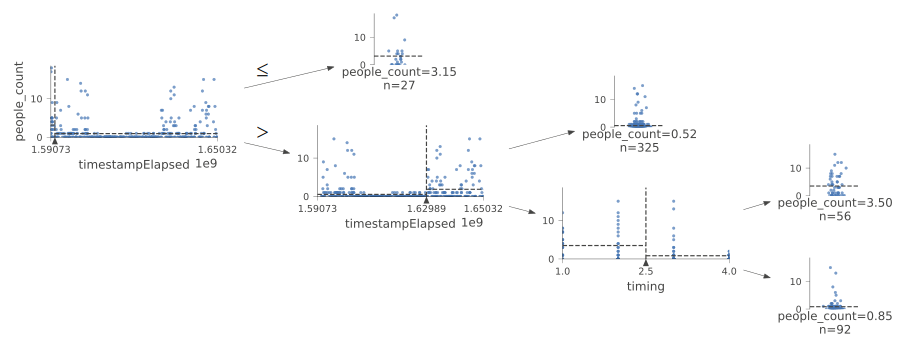

In [28]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

Let's now have the decision tree algorithm build a bigger tree. Here, we are not passing in any stopping criteria such as `max_leaf_nodes`:

In [29]:
m = DecisionTreeRegressor()
m.fit(xs, y);

We'll create a little function to check the root mean squared error of our model (`m_rmse`).

In [30]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [31]:
m_rmse(m, xs, y)

0.067271

So, our model is perfect, right? Not so fast... remember we really need to check the validation set, to ensure we're not overfitting:

In [32]:
m_rmse(m, valid_xs, valid_y)

4.923308

Oops—it looks like we might be overfitting pretty badly. Here's why:

In [33]:
m.get_n_leaves(), len(xs)

(61508, 200167)

We've got nearly as many leaf nodes as data points! That seems a little over-enthusiastic. Indeed, sklearn's default settings allow it to continue splitting nodes until there is only one item in each leaf node. Let's change the stopping rule to tell sklearn to ensure every leaf node contains at least 40 pool records:

In [34]:
m = DecisionTreeRegressor(min_samples_leaf=40)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(1.53366, 3.076811)

That looks much better. Let's check the number of leaves again:

In [35]:
m.get_n_leaves()

3017

# Creating Random Forests

We can create a random forest just like we created a decision tree, except now, we are also specifying parameters that indicate how many trees should be in the forest, how we should subset the data items (the rows), and how we should subset the fields (the columns).

In the following function definition `n_estimators` defines the number of trees we want, `max_samples` defines how many rows to sample for training each tree, and `max_features` defines how many columns to sample at each split point (where `0.5` means "take half the total number of columns"). We can also specify when to stop splitting the tree nodes, effectively limiting the depth of the tree, by including the same `min_samples_leaf` parameter we used in the last section. Finally, we pass `n_jobs=-1` to tell sklearn to use all our CPUs to build the trees in parallel. By creating a little function for this, we can more quickly try different variations in the rest of this chapter:

In [36]:
def rf(xs, y, n_estimators=40, max_samples=150000,
       max_features=0.5, min_samples_leaf=10, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [37]:
m = rf(xs, y);

In [38]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(1.34048, 2.896812)

Our validation RMSE is now  improved over our last result produced by the `DecisionTreeRegressor`, which made just one tree using all the available data:

One of the most important properties of random forests is that they aren't very sensitive to the hyperparameter choices, such as `max_features`. You can set `n_estimators` to as high a number as you have time to train—the more trees you have, the more accurate the model will be. `max_samples` can often be left at its default, unless you have over 200,000 data points, in which case setting it to 200,000 will make it train faster with little impact on accuracy. `max_features=0.5` and `min_samples_leaf=4` both tend to work well, although sklearn's defaults work well too.

The sklearn docs [show an example](http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html) of the effects of different `max_features` choices, with increasing numbers of trees. In the plot, the blue plot line uses the fewest features and the green line uses the most (it uses all the features). As you can see in <<max_features>>, the models with the lowest error result from using a subset of features but with a larger number of trees.

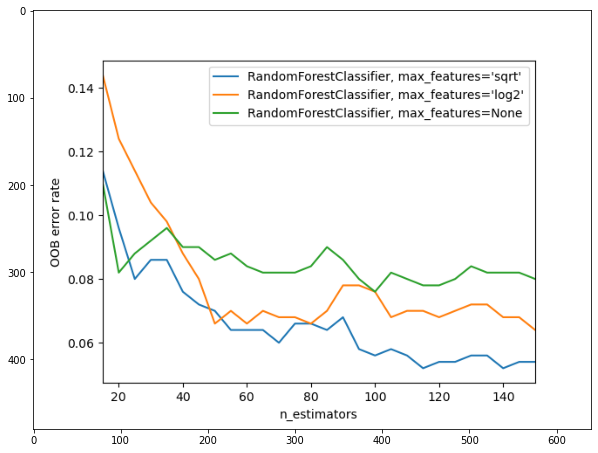

In [39]:
from skimage import io
plt.figure(figsize = [10, 10])
image = io.imread('https://scikit-learn.org/stable/_images/sphx_glr_plot_ensemble_oob_001.png')
plt.imshow(image)

To see the impact of `n_estimators`, let's get the predictions from each individual tree in our forest (these are in the `estimators_` attribute):

In [40]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [41]:
r_mse(preds.mean(0), valid_y)

2.896812

As you can see, `preds.mean(0)` gives the same results as our random forest:

Let's see what happens to the RMSE as we add more and more trees. 

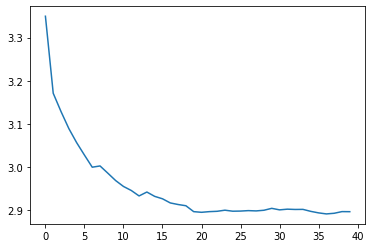

In [42]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

As you can see that, the improvement levels goes down bit after around 26 trees that's tell us it not always better to increase the `n_estimators`

The performance on our validation set is worse than on our training set. But is that because we're overfitting, or because the validation set covers a different time period, or a bit of both? With the existing information we've seen, we can't tell. However, random forests have a very clever trick called *out-of-bag* (OOB) error that can help us with this (and more!).

# Out-of-Bag Error

Recall that in a random forest, each tree is trained on a different subset of the training data. The OOB error is a way of measuring prediction error on the training set by only including in the calculation of a row's error trees where that row was not included in training. This allows us to see whether the model is overfitting, without needing a separate validation set.

This is particularly beneficial in cases where we have only a small amount of training data, as it allows us to see whether our model generalizes without removing items to create a validation set. The OOB predictions are available in the `oob_prediction_` attribute. Note that we compare them to the training labels, since this is being calculated on trees using the training set.

In [43]:
r_mse(m.oob_prediction_, y)

1.478893

We can see that our OOB error is much lower than our validation set error. This means that something else is causing that error, in addition to normal generalization error.

This is one way to interpret our model's predictions—let's focus on more of those now.

# Model Interpretation

For tabular data, model interpretation is particularly important. For a given model, the things we are most likely to be interested in are:

- How confident are we in our predictions using a particular row of data?
- For predicting with a particular row of data, what were the most important factors, and how did they influence that prediction?
- Which columns are the strongest predictors, which can we ignore?
- Which columns are effectively redundant with each other, for purposes of prediction?
- How do predictions vary, as we vary these columns?

As we will see, random forests are particularly well suited to answering these questions. Let's start with the first one!

### Tree Variance for Prediction Confidence

We saw how the model averages the individual tree's predictions to get an overall prediction—that is, an estimate of the value. But how can we know the confidence of the estimate? One simple way is to use the standard deviation of predictions across the trees, instead of just the mean. This tells us the relative confidence of predictions. In general, we would want to be more cautious of using the results for rows where trees give very different results (higher standard deviations), compared to cases where they are more consistent (lower standard deviations).

In the earlier section on creating a random forest, we saw how to get predictions over the validation set, using a Python list comprehension to do this for each tree in the forest:

In [44]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])
preds.shape

(40, 17685)

Now we have a prediction for every tree and every person inside the pool (40 trees and 2148 example) in the validation set.

Using this we can get the standard deviation of the predictions over all the trees, for each example:

In [45]:
preds_std = preds.std(0)

Here are the standard deviations for the predictions for the first five persons inside the pool that is, the first five rows of the validation set:

In [46]:
preds_std[:5]

array([0.29316759, 0.29362752, 0.28802444, 0.29063873, 0.2921857 ])

As you can see, the confidence in the predictions varies widely. For some examples, there is a low standard deviation because the trees agree. For others it's higher, as the trees don't agree. This is information that would be useful in a production setting; for instance, if you were using this model to decide how many people are inside the pool, a low-confidence prediction might cause you to look more carefully at an item before you made any decision.

# Feature Importance

It's not normally enough just to know that a model can make accurate predictions—we also want to know *how* it's making predictions. *feature importance* gives us insight into this. We can get these directly from sklearn's random forest by looking in the `feature_importances_` attribute. Here's a simple function we can use to pop them into a DataFrame and sort them:

In [47]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [48]:
fi = rf_feat_importance(m, xs)
fi[:11]

,cols,imp
16,timestampElapsed,0.390113
8,hour,0.168570
2,timing,0.100563
3,Temperature (C),0.069381
0,weekday,0.059906
6,day,0.054602
7,weekofyear,0.051983
4,year,0.040687
9,minute,0.023394
5,month,0.016004


A plot of the feature importances shows the relative importances more clearly:

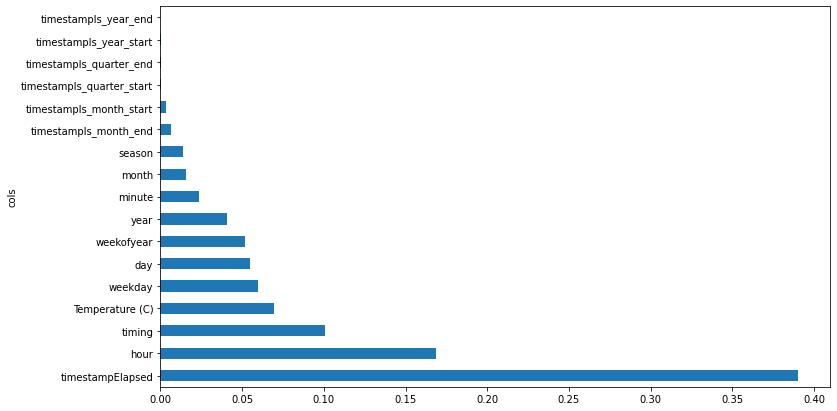

In [49]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

The way these importances are calculated is quite simple yet elegant. The feature importance algorithm loops through each tree, and then recursively explores each branch. At each branch, it looks to see what feature was used for that split, and how much the model improves as a result of that split. The improvement (weighted by the number of rows in that group) is added to the importance score for that feature. This is summed across all branches of all trees, and finally the scores are normalized such that they add to 1.

### Removing Low-Importance Variable

It seems likely that we could use just a subset of the columns by removing the variables of low importance and still get good results. Let's try just keeping those with a feature importance greater than season values:

In [50]:
fi[fi['cols'] == 'season']

,cols,imp
1,season,0.013971


which is 0.001793:

In [51]:
to_keep = fi[fi.imp>0.001793].cols
len(to_keep)

13

We can retrain our model using just this subset of the columns:

In [52]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]
m = rf(xs_imp, y)

And here's the result:

In [53]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(1.339441, 2.905772)

Our accuracy is about the same, but we have fewer columns to study:

In [54]:
len(xs.columns), len(xs_imp.columns)

(17, 13)

We've found that generally the first step to improving a model is simplifying it—78 columns was too many for us to study them all in depth! Furthermore, in practice often a simpler, more interpretable model is easier to roll out and maintain.

This also makes our feature importance plot easier to interpret. Let's look at it again:

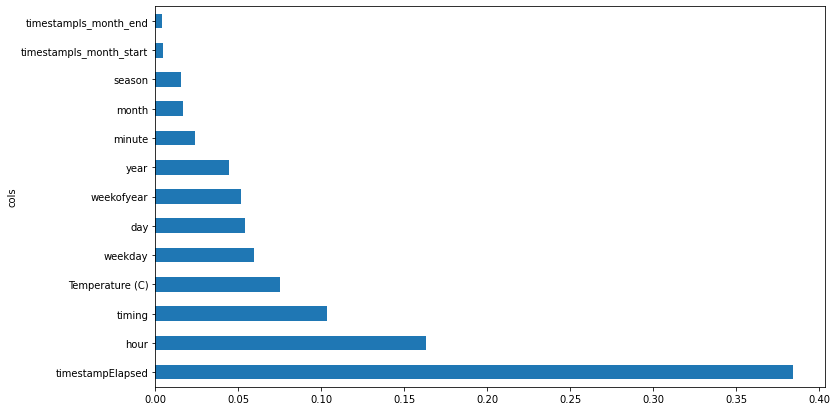

In [55]:
plot_fi(rf_feat_importance(m, xs_imp));

One thing that makes this harder to interpret is that there seem to be some variables with very similar meanings: for example, `timestampIs_month_start` and `timestampIs_month_end`. Let's try to remove any redundent features. 

## Removing Redundant Features

Let's try removing some of these closely related features to see if the model can be simplified without impacting the accuracy. First, we create a function that quickly trains a random forest and returns the OOB score, by using a lower `max_samples` and higher `min_samples_leaf`. The OOB score is a number returned by sklearn that ranges between 1.0 for a perfect model and 0.0 for a random model. (In statistics it's called *R^2*, although the details aren't important for this explanation.) We don't need it to be very accurate—we're just going to use it to compare different models, based on removing some of the possibly redundant columns:

### See the Correlation

<AxesSubplot:>

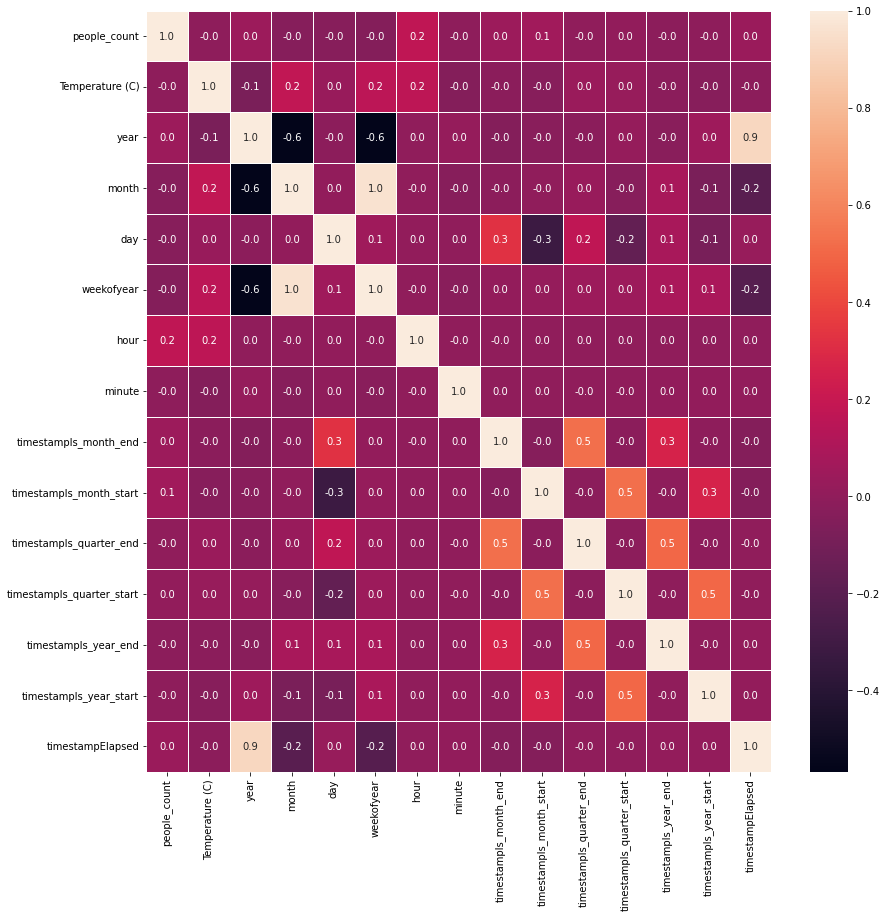

In [56]:
import seaborn as sns
f, ax = plt.subplots(figsize = (14,14))
sns.heatmap(df.corr(),
            annot = True,
            linewidths = .5,
            fmt = '.1f',
            ax = ax)

In [57]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15,
        max_samples=50000, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

Here's our baseline:

In [58]:
get_oob(xs_imp)

0.6590247203770201

Now we try removing each of our potentially redundant variables, one at a time:

In [59]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
    'timestampElapsed', 'hour', 'timing', 'Temperature (C)', 'weekday',
        'day', 'weekofyear', 'year', 'minute', 'season', 'month',
        'timestampIs_month_end', 'timestampIs_month_start')}

{'timestampElapsed': 0.6471513277211918,
 'hour': 0.5937317883185458,
 'timing': 0.6598787852735892,
 'Temperature (C)': 0.6599762685249589,
 'weekday': 0.6381786355987572,
 'day': 0.6604595123254827,
 'weekofyear': 0.6609453587102161,
 'year': 0.6631760415640466,
 'minute': 0.6607793815262698,
 'season': 0.6625376877023079,
 'month': 0.6613880014791954,
 'timestampIs_month_end': 0.6619893987190426,
 'timestampIs_month_start': 0.6621774473758895}

Now let's try dropping multiple variables. We'll drop one from each of the tightly aligned pairs we noticed earlier. Let's see what that does:

In [60]:
to_drop = ['year', 'weekofyear','hour']
get_oob(xs_imp.drop(to_drop, axis=1))

0.5934357955207834

Looking good! This is really not much worse than the model with all the fields. Let's create DataFrames without these columns, and save them:

In [61]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [62]:
save_pickle(path/'xs_final.pkl', xs_final)
save_pickle(path/'valid_xs_final.pkl', valid_xs_final)

We can load them back later with:

In [63]:
xs_final = load_pickle(path/'xs_final.pkl')
valid_xs_final = load_pickle(path/'valid_xs_final.pkl')

Now we can check our RMSE again, to confirm that the accuracy hasn't substantially changed.

In [64]:
m = rf(xs_final, y)
m_rmse(m, xs_final, y), m_rmse(m, valid_xs_final, valid_y)

(1.402419, 3.37315)

By focusing on the most important variables, and removing some redundant ones, we've greatly simplified our model. Now, let's see how those variables affect our predictions using partial dependence plots.

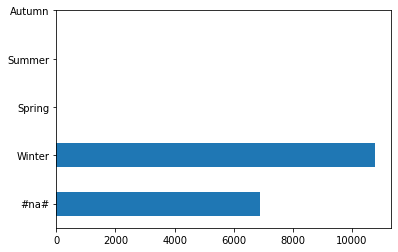

In [66]:
p = valid_xs_final['season'].value_counts(sort=False).plot.barh()
c = to.classes['season']
plt.yticks(range(len(c)), c);

* **That's all for now. Next update i'm canna continnew editing and trying to improve the accuracy.**